In [55]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk import trigrams
from nltk import bigrams
from collections import Counter
from typing import Dict, List, Optional, Union, cast

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import os
import time
import csv


import requests
import prepare

from sklearn.model_selection import train_test_split

#statistical testing
from scipy import stats
from scipy.stats import pearsonr, spearmanr

# Project Planning

The goal of this project is to use Natural Language Processing in order to build a predictive model of programming languages using the text from a users Github repository's readme.md. Planning for this project involved:

- Acquire data by webscraping Github to obtain enough text from repositories of *finish this sentence

- Create a readme.md, data dictionary, visualizations to accompany a formal presentation, and a Final Report Notebook.

- Clean and prepare the data for the first iteration through the data science pipeline, and automate these processes by storing as functions where applicable.

- Clearly define at least two hypotheses, set an alpha, run statistical tests as needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.

- Establish the baseline accuracy and document well.

- Train several classification models.

- Evaluate models on train and validate datasets.

- Document executive summary, conclusions, takeaways, and next steps in the Final Report Notebook.

- Upload readme.md, data dictionary, prepare.py, acquire.py, and Final Report Notebook.

# Executive Summary

- The languages chosen to build the predictive model were: Python,Java, R, HTML, and JavaScript. 

- The models used were *insert model names here* with the best performing model being *insert model here*

    - *if applicable insert features included in the model here*:
    
        - feature
        - feature 
        - feature
   
- *insert interesting observation/takeaway*

- *insert whether or not the model beat baseline*

- *insert insights from eda/statistical testing here*

# Acquire

- This data was obtained from Github *finish sentence*

- *something, something dark side*

- *something, something Darth Maul*

In [2]:
df = prepare.wrangle_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 2142
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1627 non-null   object
 1   language         1627 non-null   object
 2   readme_contents  1627 non-null   object
 3   stemmed          1627 non-null   object
 4   lemmatized       1627 non-null   object
 5   total_words      1627 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 89.0+ KB


In [3]:
#train, test, split
train_validate, test = train_test_split(df, test_size = .2, random_state = 123, stratify = df.language)
train, validate = train_test_split(train_validate, test_size = .3, random_state = 123, stratify = train_validate.language)

train.head()

,repo,language,readme_contents,stemmed,lemmatized,total_words
433,vjcho/lemonade,HTML,"# lemonade\n\n“I was served lemons, but I made...",lemonadei serv lemon made lemonad despit pain ...,lemonadei served lemon made lemonade despite p...,41
1804,Henry-Cook/NYS-Mental-Health-Services-Locator,JavaScript,# New York State Mental Health Services Locato...,new york state mental health servic locat proj...,new york state mental health service locator p...,590
204,Paulwamaria/whisper-blog,Python,# WHISPER BLOG\n\n## Description\n\nWHISPERING...,whisper blog descriptionwhisperingi web applic...,whisper blog descriptionwhisperingis web appli...,121
1492,ChanceYoung/MentalHealthSurvey,JavaScript,# MentalHealthSurvey\nMental Health Survey for...,mentalhealthsurveyment health survey snow coll...,mentalhealthsurveymental health survey snow co...,56
959,Etan01/CalmMind-quickhack,HTML,# QuickHack 2021 - Calm Mind \n\n#### <u>Open ...,quickhack 2021 calm mind open categoryteam mem...,quickhack 2021 calm mind open categoryteam mem...,210


# Prepare

- We scraped *insert how many* Github repositories

- Initially, *insert how many languages* were included

- In order to improve accuracy during the modeling process, this project focused on the top five programming languages that came up in the repository search *insert topic here if applicable*, which are:

    - Java
    - HTML
    - Python
    - R
    - JavaScript

# Explore

### Language Histograms/ Visualization?

<AxesSubplot:>

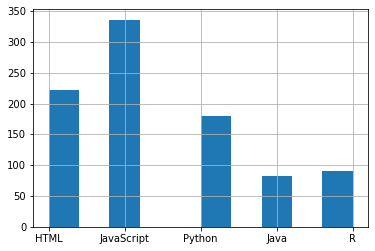

In [4]:
train.language.hist()

array([[<AxesSubplot:title={'center':'total_words'}>]], dtype=object)

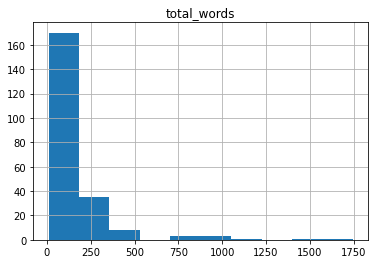

In [5]:
train.loc[train['language'] == 'HTML'].hist()

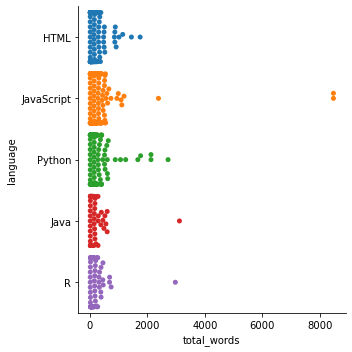

In [6]:
#plt.figure(fig_size = (10, 8))
sns.catplot(data = train,
           x = 'total_words',
           y = 'language',
           kind = 'swarm')

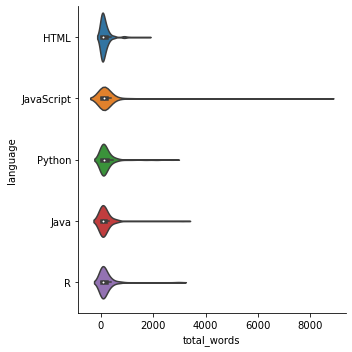

In [7]:
sns.catplot(data = train,
           x = 'total_words',
           y = 'language',
           kind = 'violin')

---

- Put this in a function

In [8]:
langs = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
langs.columns = ['counts', 'percent']
langs

#maybe show this as histograms or count plots

,counts,percent
JavaScript,600,0.368777
HTML,396,0.243393
Python,320,0.196681
R,162,0.099570
Java,149,0.091580


- Function?

In [9]:
ADDITIONAL = ['The', 'I', 'This', 'app', 'run', 'project', 'user', 'use', 'mental', 'file', 'health',
       'create', 'page', 'code', 'also', 'help', 'used']
             
def clean(readme_contents):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL
    text = (unicodedata.normalize('NFKD', readme_contents)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    #words = re.sub(r'[^a-z\s]', '', text).split()
    words = re.sub (r'([^a-zA-Z ]+?)', "", text).split()
    #words = re.sub(r'[\D]', '', words).split()
    
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


#making dfs with clean function for all langs
JavaScript_words = clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
HTML_words = clean(' '.join(df[df.language == 'HTML'].readme_contents))
Python_words = clean(' '.join(df[df.language == 'Python'].readme_contents))
Java_words = clean(' '.join(df[df.language == 'Java'].readme_contents))
R_words = clean(' '.join(df[df.language == 'R'].readme_contents))
all_words = clean(' '.join(df.readme_contents))


#make dfs to show frequencies of words

JavaScript_freq = pd.Series(JavaScript_words).value_counts()
HTML_freq = pd.Series(HTML_words).value_counts()
Python_freq = pd.Series(Python_words).value_counts()
Java_freq = pd.Series(Java_words).value_counts()
R_freq = pd.Series(R_words).value_counts()
all_freq = pd.Series(all_words).value_counts()


word_counts = (pd.concat([all_freq, JavaScript_freq, HTML_freq, Python_freq, 
                    Java_freq, R_freq], axis=1, sort=True)
                .set_axis(['all_words', 'JavaScript', 'HTML', 'Python', 'Java', 'R'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all_words,JavaScript,HTML,Python,Java,R
aa,2,0,1,0,1,0
aaa,1,0,0,0,1,0
aaaa,3,0,0,1,0,2
aac,1,0,0,0,1,0
aachal,2,2,0,0,0,0


### hypos/questions

- QUESTION 1: do certain languages have a higher average readme word count than others?
- QUESTION 2: are certain frequently occuring words share across more than one language?
- QUESTION 3: what words, if any, are frequently occuring in readmes for certain langauges that are barely prevelant in other language readmes?
- QUESTION 4: what language's readme trends are closest related to the trends of all readmes?

### QUESTION 1

- do certain languages have a higher average readme word count than others?

   
   - in this section: 
            - make bins of high, med, and low readme word counts
            - graph these counts for comparison 
            - run T-test/s on language vs. total counts column
            - summarize findings

In [10]:
#show averages with group by:
df.total_words.groupby(df.language).mean().round()

language
HTML          167.0
Java          140.0
JavaScript    245.0
Python        196.0
R             169.0
Name: total_words, dtype: float64

In [11]:
total_words = pd.DataFrame(df.total_words.groupby(df.language).mean().round())
total_words

,total_words
language,
HTML,167.0
Java,140.0
JavaScript,245.0
Python,196.0
R,169.0


In [12]:
#prep to make bins for the better visual
conditions = [(df.total_words > 171),
              (df.total_words >= 51) & (df.total_words <= 171),
              (df.total_words < 51)]
choices = ['high_count', 'med_count', 'low_count']

df['count_bin'] = np.select(conditions, choices)

In [13]:
df_plot = df.groupby(['language', 'count_bin']).size().reset_index().pivot(columns='count_bin', index='language', values=0)

<AxesSubplot:xlabel='language'>

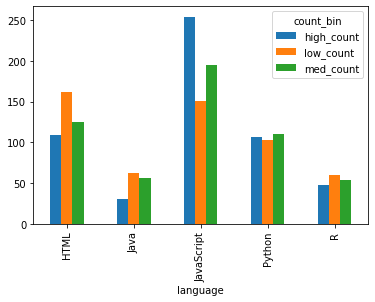

In [14]:
#I like this to show lang counts with bins

df_plot.plot(kind='bar')

#### Takeaways:

- There are certain languages that have a higher average readme word count than others.
- Java has the lowest average word count while those from repositories using JavaScript have considerably more words than the other four programming languages. 

### Are the word counts for JavaScript significantly higher than the mean word counts of all languages?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: JavaScript's mean word count is <= than the combined mean word count of all languages.

𝐻𝑎: JavaScript's mean word count is > than the combined mean word count of all programming languages.

In [15]:
α = 0.05

js_sample = word_counts.JavaScript

overall_mean = word_counts.all_words.mean()

t, p = stats.ttest_1samp(js_sample, overall_mean)

print(f'P Value: {p/2:.3f}')

if p/2 < α and t > 0:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Fail to reject the null hypothesis.


---

### Are the word counts for JavaScript significantly higher than the word counts of Python?

Two Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: Javascript's mean word count is <= than the mean word count of Python.

𝐻𝑎: Javascript's mean word count is > the mean word count of Python.

In [16]:
#test for equal variance 
#H0 is that the variances are equal
#Ha is that the variances are not equal
# if p > .05, variances are not significantly different and set argument to equal_var = True
#if p < .05, variances are significantly different and set argument to equal_var = False
#Levene test on two groups


#set alpha
α = 0.05

#perform test to determine variance
f, p = stats.levene(word_counts.JavaScript,
             word_counts.Python)

#evaluate coefficient and p-value
print(f'Levene\'s F-statistic: {f:.3f}\nP-value: {p:.3f}')


#evaluate if 
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Levene's F-statistic: 285.039
P-value: 0.000
Reject the null hypothesis.


In [17]:
#set alpha
α = 0.05

#perform test
t, p = stats.ttest_ind(word_counts.JavaScript, word_counts.Python, equal_var = False)

#print p-value
print(f'P Value: {p/2:.3f}')

#evaluate if mean of the word counts associated w/ JavaScript is significantly higher than the mean 
# of the mean word counts associated with Python, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Reject the null hypothesis.


---

### Are the word counts for R significantly lower than the word counts of Python?

Two Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: R's mean word count is >= than the mean word count of Python.

𝐻𝑎: R's mean word count is < the mean word count of Python.

In [18]:
#test for equal variance 
#H0 is that the variances are equal
#Ha is that the variances are not equal
# if p > .05, variances are not significantly different and set argument to equal_var = True
#if p < .05, variances are significantly different and set argument to equal_var = False
#Levene test on two groups


#set alpha
α = 0.05

#perform test to determine variance
f, p = stats.levene(word_counts.R,
             word_counts.Python)

#evaluate coefficient and p-value
print(f'Levene\'s F-statistic: {f:.3f}\nP-value: {p:.3f}')


#evaluate if 
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Levene's F-statistic: 267.514
P-value: 0.000
Reject the null hypothesis.


In [19]:
#set alpha
α = 0.05

#perform test
t, p = stats.ttest_ind(word_counts.R, word_counts.Python, equal_var = False)

#print p-value
print(f'P Value: {p/2:.3f}')

#evaluate if mean of the word counts associated w/ R is significantly lower than the mean 
# of the mean word counts associated with Python, is p/2 < a and t < 0?
if p/2 < α and t < 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Reject the null hypothesis.


### QUESTION 2: 
- are certain frequently occurring words share across more than one language?

   - in this section: 
   
            - make a top_words dataframe that includes the top 20 most frequently occureing words in each language
            - see if any of of a language's top 20 readme words (not including stopwords) are shared with other language's/s' top 20
            - summarize findings

In [20]:
#makes dfs for arranging top words by the diff langs to help compare
#if tops in some langs may be way different than tops in others
js_top = word_counts.sort_values(by='JavaScript', ascending=False).head(20)
html_top = word_counts.sort_values(by='HTML', ascending=False).head(20)
python_top = word_counts.sort_values(by='Python', ascending=False).head(20)
java_top = word_counts.sort_values(by='Java', ascending=False).head(20)
r_top = word_counts.sort_values(by='R', ascending=False).head(20)

In [21]:
#makes one df of the top 20 words in all dfs 
top_words = (pd.concat([js_top, html_top, python_top, java_top,
                    r_top], axis=0, sort=True)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

top_words.head()

,HTML,Java,JavaScript,Python,R,all_words
build,90,41,1268,54,22,1475
react,47,24,1209,22,0,1302
npm,93,33,1207,15,0,1348
section,219,8,843,42,18,1130
test,125,55,782,127,26,1115


In [22]:
#drops all as we don't need that to compare for next step
top_words= top_words.drop(columns=['all_words'])

### Graph this?

<AxesSubplot:>

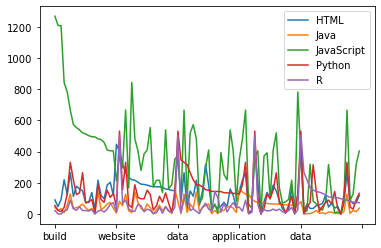

In [23]:
#if you want to graph somehow, but not super necessary to include this
top_words.plot()

In [24]:
top_words

,HTML,Java,JavaScript,Python,R
build,90,41,1268,54,22
react,47,24,1209,22,0
npm,93,33,1207,15,0
section,219,8,843,42,18
test,125,55,782,127,26
...,...,...,...,...,...
using,264,127,666,331,89
tech,89,3,86,44,81
width,66,22,129,31,76
folder,72,14,318,92,73


In [25]:
# sns.catplot(data = top_words,
#            x = top_words.index,
#            y = 'HTML')

In [26]:
#these are the frequent words that are shared amongst 2 or more programming languages
tops = top_words[top_words.index.value_counts() > 1]
tops.index.unique()

Index(['section', 'test', 'using', 'install', 'make', 'need', 'feature',
       'user', 'time', 'information', 'file', 'data', 'people', 'one',
       'application', 'model', 'analysis', 'dataset'],
      dtype='object')

### QUESTION 2 summary: 

- are certain frequently occurring words share across more than one language?

The following words are amongst the top 20 frequently occurring words (excluding stop words) in 2 or more languages:

'section', 'test', 'install', 'make', 'need', 'feature', 'user', 'time',
       'information', 'file', 'command', 'people', 'one', 'application',
       'model', 'dataset', 'analysis', 'following'

---

# Mindy Redoing, wait!

### QUESTION 3: 
- what words, if any, are frequently occuring in readmes for certain langauges that are barely prevelant in other language readmes?

   - in this section: 
   
            - make dfs (divided for graphing) that looks at the top 20 most frequently occuring words (in all records)
            -change the counts to percentages to show word prevelance per language of the top words
            - graph the relationships
            - run statistical tests to see what top words, if any, have a significant frequency difference in different languages
            - summarize findings

In [27]:
#just makes dfs of some of the most freq words. divided like this just to make graphs
#look nicer
#most_freq_700 is 700-799 words
#most_freq_800 is 800-999 words
#most_freq is is 1000+
most_freq_700 = word_counts[word_counts['all_words'] > 700] 
most_freq_700 = most_freq_700[most_freq_700['all_words'] < 800]
most_freq_800 = word_counts[word_counts['all_words'] >= 800]
most_freq_800 = most_freq_800[most_freq_800['all_words'] < 1000]
most_freq = word_counts[word_counts['all_words'] >= 1000]

In [28]:
#making dfs to look at these as a percentage and give each language
#equal weight looking at word importance as our records are evenly 
#distributed
word_perc = pd.DataFrame()
for col in most_freq.columns:
    word_perc = word_perc.append(most_freq[col].sort_values(ascending=False)/most_freq[col].sum())

word_perc_700 = pd.DataFrame()
for col in most_freq_700.columns:
    word_perc_700 = word_perc_700.append(most_freq_700[col].sort_values(ascending=False)/most_freq_700[col].sum())
    
word_perc_800 = pd.DataFrame()
for col in most_freq_800.columns:
    word_perc_800 = word_perc_800.append(most_freq_800[col].sort_values(ascending=False)/most_freq_800[col].sum())

<AxesSubplot:>

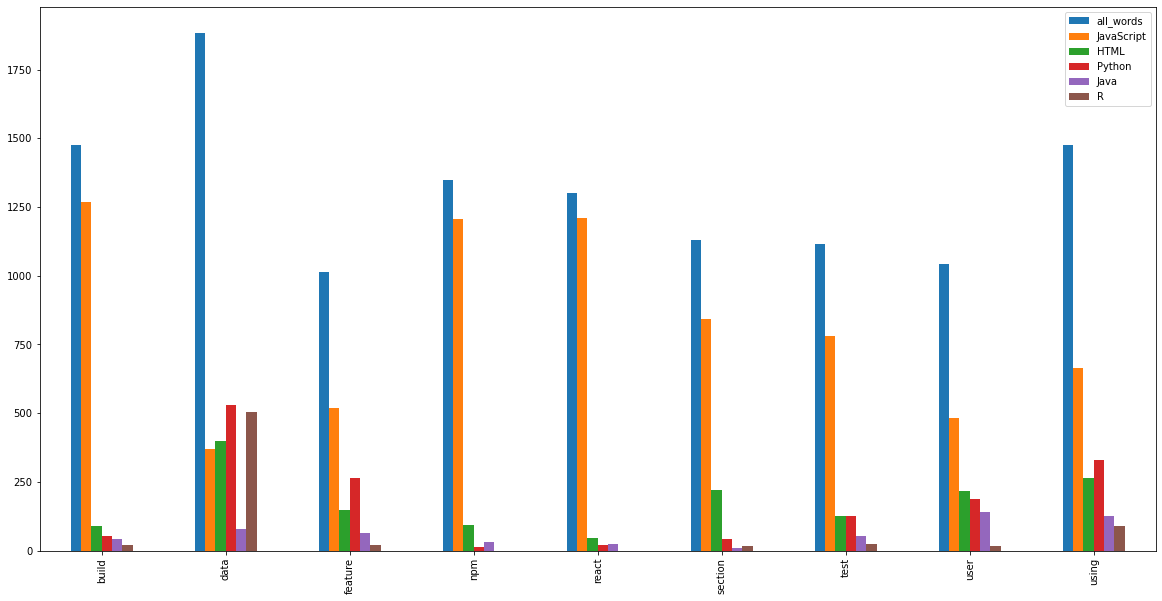

In [29]:
#incase we wanted to use the counts (can do with the 3 most_freq dfs, but I
#think we could skip this and just do the word_perc dfs for the graphs
#as I think they are more meaningful)
plt.rcParams["figure.figsize"] = (20,10)
most_freq.plot(kind='bar')

In [30]:
#transponsing dfs to make better graphs
word_perc_T = word_perc.T
word_perc_700_T = word_perc_700.T
word_perc_800_T = word_perc_800.T

to look at similarities, we simple look at bars w similar heights. That will show they have a similar distribution of that specific word

<AxesSubplot:>

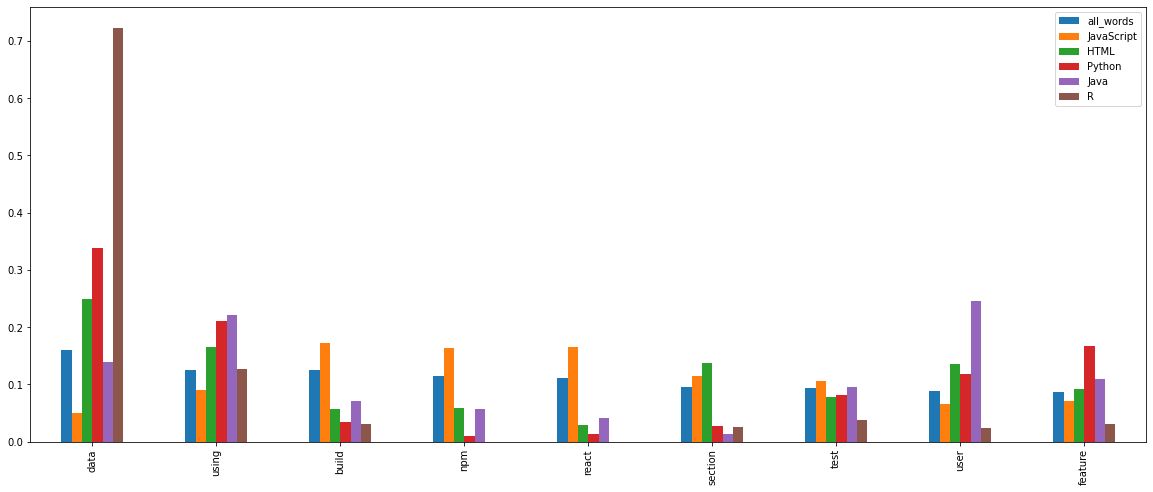

In [31]:
#the next 3 would make sense to do subplots. I'll make a function
#for them, I think we should get rid of all here too
plt.rcParams["figure.figsize"] = (20,8)
word_perc_T.plot(kind='bar')

<AxesSubplot:>

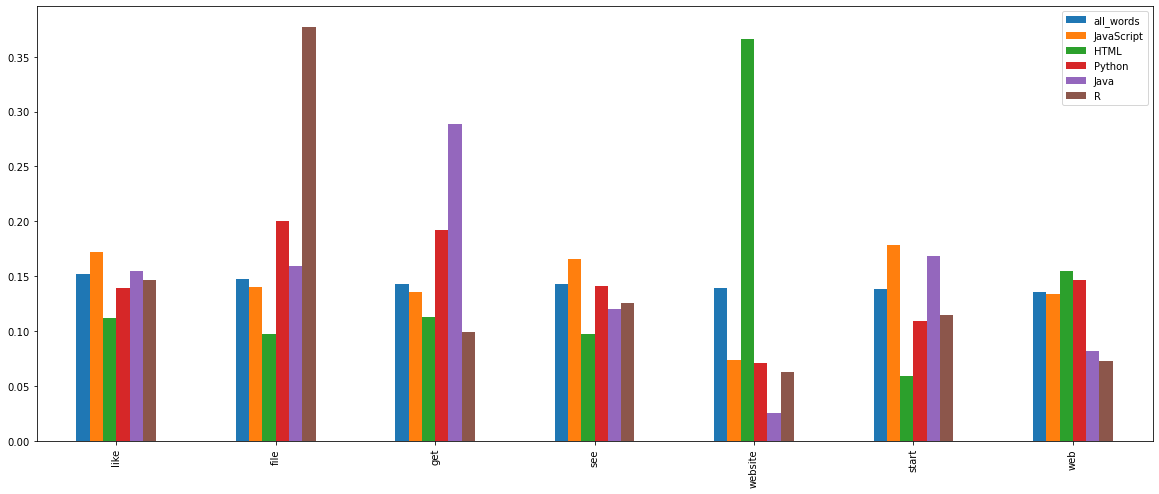

In [32]:
plt.rcParams["figure.figsize"] = (20,8)
word_perc_700_T.plot(kind='bar')

<AxesSubplot:>

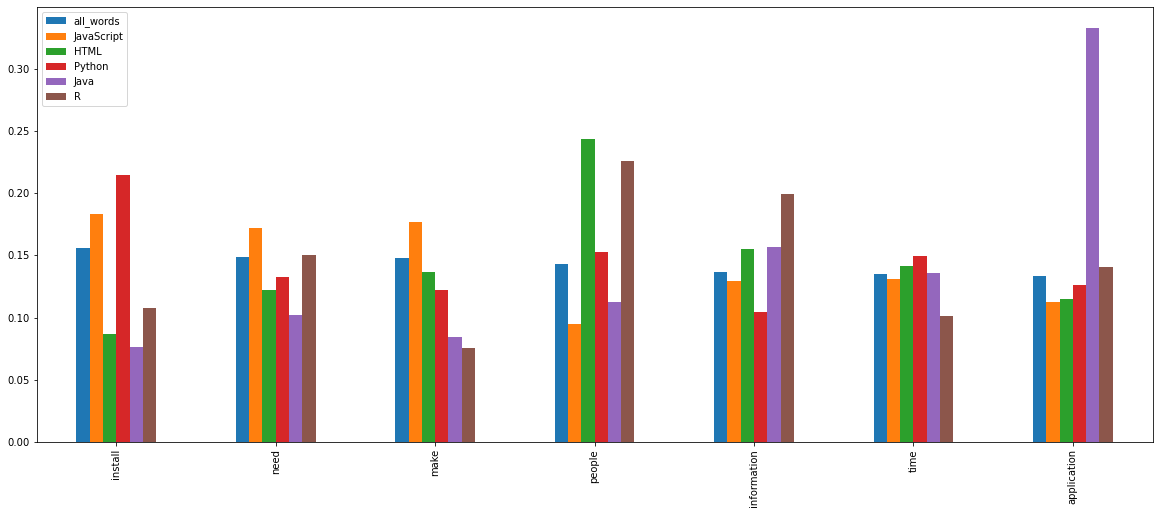

In [33]:
plt.rcParams["figure.figsize"] = (20,8)
word_perc_800_T.plot(kind='bar')

### QUESTION 3 summary: 

- what words, if any, are frequently occuring in readmes for certain langauges that are barely prevelant in other language readmes?

Looking at graphs (and stat tests), these top occuring words may be helpful in identifying said languages:

- 'file': R
- 'website': HTML
- 'application': Java

# Bigrams/Trigrams?

# Wordcloud?

In [34]:
# js_words = clean(' '.join(df[df.language == 'JavaScript'].lemmatized))
# HTML_words = clean(' '.join(df[df.language == 'HTML'].lemmatized))
# Python_words = clean(' '.join(df[df.language == 'Python'].lemmatized))
# Java_words = clean(' '.join(df[df.language == 'Java'].lemmatized))
# R_words = clean(' '.join(df[df.language == 'R'].lemmatized))

# words_all = clean(' '.join(df.lemmatized))

In [35]:
# from wordcloud import WordCloud

# #all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
# js_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(js_words))
# html_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(HTML_words))
# python_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(Python_words))
# java_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(Java_words))
# R_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(R_words))

# # plt.figure(figsize=(10, 8))
# axs = [plt.axes([0, 0, .5, .5]), plt.axes([0, 1, .5, .5]), plt.axes([1, 0, .5, .5]), plt.axes([1, 1, .5, .5])]

# #axs[0].imshow(words_all)
# axs[0].imshow(js_cloud)
# axs[1].imshow(html_cloud)
# axs[2].imshow(python_cloud)
# axs[3].imshow(java_cloud)
# axs[4].imshow(R_cloud)



# # axs[0].set_title('All Words')
# axs[0].set_title('js_words')
# axs[1].set_title('HTML_words')
# axs[2].set_title('Python_words')
# axs[3].set_title('Java_words')
# axs[4].set_title('R_words')

# for ax in axs: ax.axis('off')

### QUESTION 4: 
- what language's readme trends are closest related to the trends of all readmes?

# Modeling

#### Our approach is to:
- split our data into train, validate and test
- use the TFIDF and the count vectorizers to encode the values 
- use the logistic regression, and the decision trees for modeling(predicting the language)
- use the confusion matrix to dissect the accuacy of our models
- finally use the the test sample on our best model



In [36]:
#splitting the data to train validate split
train,validate,test = prepare.split_df(df)
train.shape,validate.shape, test.shape

((910, 7), (391, 7), (326, 7))

In [37]:
# Setup the X variables
X_train = train.lemmatized
X_validate = validate.lemmatized
X_test = test.lemmatized

# Setup the y variables
y_train = train.language
y_validate = validate.language
y_test = test.language



In [71]:
# Create the tfidf vectorizer object
# encodes these values for classification purposes
tfidf = TfidfVectorizer()

# Fit on the training data
tfidf.fit(X_train)

# Use the object
X_train_vectorized = tfidf.transform(X_train)
X_validate_vectorized = tfidf.transform(X_validate)
X_test_vectorized = tfidf.transform(X_test)

### Logistic Regression  (TFIDF Vectorizer)

In [72]:
#after vectorizing, we are ready to model
lm = LogisticRegression()

# Fit the classification model to vectorized train data
lm.fit(X_train_vectorized, y_train)

LogisticRegression()

In [73]:
#creating a data frame that will be used to append any values
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

In [74]:
# Use the trained model to predict y given those vectorized inputs of X
train['predicted_lm'] = lm.predict(X_train_vectorized)
validate["predicted_lm"] = lm.predict(X_validate_vectorized)
# test['predicted'] = lm.predict(X_test_vectorized)
print(f'Train Accuracy Score: {lm.score(X_train_vectorized, y_train) * 100:.2f}%')
print(f'Validate Accuracy Score: {lm.score(X_validate_vectorized, y_validate) * 100:.2f}%')

Train Accuracy Score: 91.76%
Validate Accuracy Score: 54.48%


#### Training Accuracy Matrix

In [41]:
# accuracy matrix
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_lm, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_lm))

Accuracy: 91.21%
---
Confusion Matrix
actual        HTML  Java  JavaScript  Python   R
predicted_lm                                    
HTML           210     7           4       4   3
Java             0    46           0       0   0
JavaScript      10    27         331      10   6
Python           1     3           1     165   3
R                1     0           0       0  78
---
              precision    recall  f1-score   support

        HTML       0.92      0.95      0.93       222
        Java       1.00      0.55      0.71        83
  JavaScript       0.86      0.99      0.92       336
      Python       0.95      0.92      0.94       179
           R       0.99      0.87      0.92        90

    accuracy                           0.91       910
   macro avg       0.94      0.85      0.89       910
weighted avg       0.92      0.91      0.91       910



#### Validate Accuracy Matrix

In [42]:
# accuracy matrix
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted_lm, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_lm))

Accuracy: 59.59%
---
Confusion Matrix
actual        HTML  Java  JavaScript  Python   R
predicted_lm                                    
HTML            54    10          20      14   7
Java             0     5           0       0   0
JavaScript      34    18         117      20   7
Python           5     3           7      38   6
R                2     0           0       5  19
---
              precision    recall  f1-score   support

        HTML       0.51      0.57      0.54        95
        Java       1.00      0.14      0.24        36
  JavaScript       0.60      0.81      0.69       144
      Python       0.64      0.49      0.56        77
           R       0.73      0.49      0.58        39

    accuracy                           0.60       391
   macro avg       0.70      0.50      0.52       391
weighted avg       0.64      0.60      0.58       391




#### The logistic regression model with the tfidf vectorizer yields a 91% accuracy on the train set and 59% on validate. This clearly shows the model is overfitting.

- as illustrated by the f1 score for Java, there is a small representation of the sample so the model is not so efficient at predicting the language 
- we decided not to apply the test set on this model

### Decision Tree Classifier (tfidf vectorizer)

In [70]:
#decision tree classifier
tree = DecisionTreeClassifier(max_depth=5, random_state=123)
tree.fit(X_train_vectorized, y_train)
# Use the trained model to predict y given those vectorized inputs of X
train['predicted_t'] = tree.predict(X_train_vectorized)
validate["predicted_t"] = tree.predict(X_validate_vectorized)
# test['predicted'] = lm.predict(X_test_vectorized)
print(f'Train Accuracy Score: {tree.score(X_train_vectorized, y_train) * 100:.2f}%')
print(f'Validate Accuracy Score: {tree.score(X_validate_vectorized, y_validate) * 100:.2f}%')

Train Accuracy Score: 57.47%
Validate Accuracy Score: 50.90%


#### Train accuracy matrix Decision Tree Classifier (tfidf vectorizer)


In [52]:
## accuracy matrix Decision Tree Classifier (tfidf vectorizer)
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_t)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_t, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_t))

Accuracy: 70.99%
---
Confusion Matrix
actual       HTML  Java  JavaScript  Python   R
predicted_t                                    
HTML          125     1           9       3   1
Java            0    48           0       1   1
JavaScript     80    34         313      59  23
Python          2     0           2      95   0
R              15     0          12      21  65
---
              precision    recall  f1-score   support

        HTML       0.90      0.56      0.69       222
        Java       0.96      0.58      0.72        83
  JavaScript       0.61      0.93      0.74       336
      Python       0.96      0.53      0.68       179
           R       0.58      0.72      0.64        90

    accuracy                           0.71       910
   macro avg       0.80      0.67      0.70       910
weighted avg       0.78      0.71      0.71       910



In [53]:
## accuracy matrix Decision Tree Classifier (tfidf vectorizer)
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_t)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted_t, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_t))

Accuracy: 49.36%
---
Confusion Matrix
actual       HTML  Java  JavaScript  Python   R
predicted_t                                    
HTML           29     6          21       9   3
Java            1    13           5       1   1
JavaScript     46    16         105      30  11
Python          7     0          10      24   2
R              12     1           3      13  22
---
              precision    recall  f1-score   support

        HTML       0.43      0.31      0.36        95
        Java       0.62      0.36      0.46        36
  JavaScript       0.50      0.73      0.60       144
      Python       0.56      0.31      0.40        77
           R       0.43      0.56      0.49        39

    accuracy                           0.49       391
   macro avg       0.51      0.45      0.46       391
weighted avg       0.50      0.49      0.48       391



#### Decision Tree Classifier (tfidf vectorizer)  had an accuracy of 57% and 50% on validate.
- the model is a decision tree with a max depth of 5 models
- the accuracy was low, however, it doesnt seem to be overfitting



### Logistic Regression  ( CountVectorizer)

In [64]:
# Create the cv vectorizer object
# encodes these values for classification purposes
cv = CountVectorizer(ngram_range=(1,3))

# Fit on the training data
cv.fit(X_train)
# Use the object
X_train_cv = cv.transform(X_train)
X_validate_cv = cv.transform(X_validate)
X_test_cv = cv.transform(X_test)

#after vectorizing, we are ready to model
lm = LogisticRegression()

# Fit the classification model to vectorized train data
lm.fit(X_train_cv, y_train)

LogisticRegression()

In [65]:
# Use the trained model to predict y given those vectorized inputs of X
train['predicted_cv'] = lm.predict(X_train_cv)
validate["predicted_cv"] = lm.predict(X_validate_cv)
# test['predicted'] = lm.predict(X_test_vectorized)
print(f'Train Accuracy Score: {lm.score(X_train_cv, y_train) * 100:.2f}%')
print(f'Validate Accuracy Score: {lm.score(X_validate_cv, y_validate) * 100:.2f}%')

Train Accuracy Score: 99.78%
Validate Accuracy Score: 60.36%


#### Training Accuracy Confusion Matrix

In [46]:
print('Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_cv)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_cv, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_cv))

Train Accuracy: 99.78%
---
Confusion Matrix
actual        HTML  Java  JavaScript  Python   R
predicted_cv                                    
HTML           220     0           0       0   0
Java             0    83           0       0   0
JavaScript       2     0         336       0   0
Python           0     0           0     179   0
R                0     0           0       0  90
---
              precision    recall  f1-score   support

        HTML       1.00      0.99      1.00       222
        Java       1.00      1.00      1.00        83
  JavaScript       0.99      1.00      1.00       336
      Python       1.00      1.00      1.00       179
           R       1.00      1.00      1.00        90

    accuracy                           1.00       910
   macro avg       1.00      1.00      1.00       910
weighted avg       1.00      1.00      1.00       910



In [47]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_cv)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted_cv, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_cv))

Accuracy: 60.10%
---
Confusion Matrix
actual        HTML  Java  JavaScript  Python   R
predicted_cv                                    
HTML            62    11          24      13   6
Java             3    10           5       5   0
JavaScript      19    11         104      15   3
Python           6     3          10      36   7
R                5     1           1       8  23
---
              precision    recall  f1-score   support

        HTML       0.53      0.65      0.59        95
        Java       0.43      0.28      0.34        36
  JavaScript       0.68      0.72      0.70       144
      Python       0.58      0.47      0.52        77
           R       0.61      0.59      0.60        39

    accuracy                           0.60       391
   macro avg       0.57      0.54      0.55       391
weighted avg       0.60      0.60      0.59       391



#### The logistic regression model with the count vectorizer yields a 99% accuracy on the train set and 60% on validate. This clearly shows the model is overfitting.
- we will not proceed to use the test data with this model


### Decision Tree Classifier (CountVectorizer)

In [68]:
#decision tree classifier
tree = DecisionTreeClassifier(max_depth=5, random_state=123)
tree.fit(X_train_cv, y_train)
# Use the trained model to predict y given those vectorized inputs of X
train['predicted_cv_dt'] = tree.predict(X_train_cv)
validate["predicted_cv_dt"] = tree.predict(X_validate_cv)
test['predicted_cv_dt'] = tree.predict(X_test_cv)
print(f'Train Accuracy Score: {tree.score(X_train_cv, y_train) * 100:.2f}%')
print(f'Validate Accuracy Score: {tree.score(X_validate_cv, y_validate) * 100:.2f}%')
print(f'Test Accuracy Score: {tree.score(X_test_cv, y_test) * 100:.2f}%')


Train Accuracy Score: 52.20%
Validate Accuracy Score: 53.96%
Test Accuracy Score: 54.60%


#### Training Confusion Matrix

In [49]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_cv_dt)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_cv_dt, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_cv_dt))

Accuracy: 51.65%
---
Confusion Matrix
actual           HTML  Java  JavaScript  Python   R
predicted_cv_dt                                    
HTML              206    49         155     117  87
Java                0    32           2       0   0
JavaScript          9     2         172       3   0
Python              7     0           7      59   2
R                   0     0           0       0   1
---
              precision    recall  f1-score   support

        HTML       0.34      0.93      0.49       222
        Java       0.94      0.39      0.55        83
  JavaScript       0.92      0.51      0.66       336
      Python       0.79      0.33      0.46       179
           R       1.00      0.01      0.02        90

    accuracy                           0.52       910
   macro avg       0.80      0.43      0.44       910
weighted avg       0.76      0.52      0.51       910



#### Validate Confusion Matrix

In [50]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_cv_dt)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted_cv_dt, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_cv_dt))

Accuracy: 52.69%
---
Confusion Matrix
actual           HTML  Java  JavaScript  Python   R
predicted_cv_dt                                    
HTML               86    22          59      46  38
Java                1    14           1       1   0
JavaScript          4     0          78       2   0
Python              4     0           5      28   1
R                   0     0           1       0   0
---
              precision    recall  f1-score   support

        HTML       0.34      0.91      0.50        95
        Java       0.82      0.39      0.53        36
  JavaScript       0.93      0.54      0.68       144
      Python       0.74      0.36      0.49        77
           R       0.00      0.00      0.00        39

    accuracy                           0.53       391
   macro avg       0.57      0.44      0.44       391
weighted avg       0.65      0.53      0.52       391



#### Test Confusion Matrix

In [69]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted_cv_dt)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted_cv_dt, test.actual))
print('---')
print(classification_report(test.actual, test.predicted_cv_dt))

Accuracy: 54.60%
---
Confusion Matrix
actual           HTML  Java  JavaScript  Python   R
predicted_cv_dt                                    
HTML               69    17          44      34  33
Java                1    11           0       0   0
JavaScript          6     2          71       3   0
Python              3     0           5      27   0
---
              precision    recall  f1-score   support

        HTML       0.35      0.87      0.50        79
        Java       0.92      0.37      0.52        30
  JavaScript       0.87      0.59      0.70       120
      Python       0.77      0.42      0.55        64
           R       0.00      0.00      0.00        33

    accuracy                           0.55       326
   macro avg       0.58      0.45      0.45       326
weighted avg       0.64      0.55      0.54       326



#### Decision Tree Classifier (tfidf vectorizer)  had an accuracy of 52% , 53% on validate and 54% on test.
- the model is a decision tree with a max depth of 5
- the accuracy was low, however, it doesnt seem to be overfitting
- since the train and validate results on the model are almost identical in accuracy, we went ahead and tested it on test data 
- this yeilded an accuracy of 54%, similar to the vlidate test set



# Conclusion

- Predicting programming languages based on the readme